In [1]:

#loading essential packages
pacman::p_load(tidyverse,skimr,knitr,sjPlot,glmnet,betareg,sjmisc,sjlabelled,leaps,maxLik,formatR, MLeval,IRdisplay,reshape2,grf,mltools,missForest,mice,fastDummies,data.table,stats,cvTools,readr,memisc,rpart,magrittr,randomForestSRC,cowplot,ggRandomForests,reshape2,gridExtra,ggthemes,randomForest,permimp,titanic,randomForestExplainer,ISLR,ellipsis,caret,ggplot2,vita,AmesHousing,InformationValue,tidyverse,caret,car,mvtnorm,MASS,tree,rpart,rpart.plot,ipred,caret)


data<- read_csv("filtered_survey_data.csv")
df <- as_tibble(data)


df=df %>% mutate(exp5_area1=df$exp5_area1/1000) %>% mutate(exp5_area2=df$exp5_area2/1000) %>% mutate(exp5_area3=df$exp5_area3/1000) %>% mutate(exp5_area4=df$exp5_area4/1000) %>% mutate(exp5_area5=df$exp5_area5/1000) 


df=df %>% mutate(exp1_area1_5 = 100 - df$exp1_area1_5)%>% mutate(exp2_area1_3 = 100 - df$exp2_area1_3) %>% mutate(exp2_area1_4 = 100 - df$exp2_area1_4) %>% mutate( exp2_area1_5 = 100 - df$exp2_area1_5) %>% mutate(exp3_area1_2 = 100 - df$exp3_area1_2) %>% mutate( exp3_area1_3 = 100 - df$exp3_area1_3) %>% mutate( exp3_area1_4 = 100 - df$exp3_area1_4)
#coding so better probabilites indicate better outcomes



summary(df)



Installing package into 'C:/Users/Ruby Abraham/Documents/R/win-library/4.0'
(as 'lib' is unspecified)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.0:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/4.0/PACKAGES'"
package 'permimp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\conda_tmp\RtmpMd1BLF\downloaded_packages

permimp installed

Warning message in pacman::p_load(tidyverse, skimr, knitr, sjPlot, glmnet, betareg, :
"Failed to install/load:
permimp"
Parsed with column specification:
cols(
  .default = col_double()
)

See spec(...) for full column specifications.

Found more than one class "tbl_df" in cache; using the first, from namespace 'tibble'

Also defined by 'memisc'

Found more than one class "tbl_df" in cache; using the first, from namespace 'tibble'

Also defined by 'memisc'



      male        main_outcome_Eng main_outcome_Sc  main_outcome_Econ
 Min.   :0.0000   Min.   :  0.00   Min.   :  0.00   Min.   :  0.00   
 1st Qu.:0.0000   1st Qu.:  0.00   1st Qu.:  0.00   1st Qu.:  0.00   
 Median :0.0000   Median :  5.00   Median :  5.00   Median :  0.00   
 Mean   :0.4753   Mean   : 19.48   Mean   : 18.79   Mean   : 15.38   
 3rd Qu.:1.0000   3rd Qu.: 30.00   3rd Qu.: 30.00   3rd Qu.: 20.00   
 Max.   :1.0000   Max.   :100.00   Max.   :100.00   Max.   :100.00   
 main_outcome_Med main_outcome_Hum  exp1_area1_1     exp1_area1_2   
 Min.   :  0.00   Min.   :  0.0    Min.   :  0.00   Min.   :  0.00  
 1st Qu.:  0.00   1st Qu.:  0.0    1st Qu.: 10.00   1st Qu.:  8.00  
 Median :  0.00   Median : 15.0    Median : 40.00   Median : 30.00  
 Mean   : 11.45   Mean   : 34.9    Mean   : 43.45   Mean   : 35.91  
 3rd Qu.: 10.00   3rd Qu.: 80.0    3rd Qu.: 75.00   3rd Qu.: 61.00  
 Max.   :100.00   Max.   :100.0    Max.   :100.00   Max.   :100.00  
  exp1_area1_3    exp1_area

In [2]:


#exp1
df$exp1_stemreturn_1=(df$exp1_area1_1+df$exp1_area2_1)/2 -(df$exp1_area3_1+df$exp1_area4_1 +df$exp1_area5_1)/3
df$exp1_stemreturn_2=(df$exp1_area1_2+df$exp1_area2_2)/2 -(df$exp1_area3_2+df$exp1_area4_2 +df$exp1_area5_2)/3
df$exp1_stemreturn_3=(df$exp1_area1_3+df$exp1_area2_3)/2 -(df$exp1_area3_3+df$exp1_area4_3 +df$exp1_area5_3)/3
df$exp1_stemreturn_4=(df$exp1_area1_4+df$exp1_area2_4)/2 -(df$exp1_area3_4+df$exp1_area4_4 +df$exp1_area5_4)/3
df$exp1_stemreturn_5=(df$exp1_area1_5+df$exp1_area2_5)/2 -(df$exp1_area3_5+df$exp1_area4_5 +df$exp1_area5_5)/3

#exp2
df$exp2_stemreturn_1=(df$exp2_area1_1+df$exp2_area2_1)/2 -(df$exp2_area3_1+df$exp2_area4_1 +df$exp2_area5_1)/3
df$exp2_stemreturn_2=(df$exp2_area1_2+df$exp2_area2_2)/2 -(df$exp2_area3_2+df$exp2_area4_2 +df$exp2_area5_2)/3
df$exp2_stemreturn_3=(df$exp2_area1_3+df$exp2_area2_3)/2 -(df$exp2_area3_3+df$exp2_area4_3 +df$exp2_area5_3)/3
df$exp2_stemreturn_4=(df$exp2_area1_4+df$exp2_area2_4)/2 -(df$exp2_area3_4+df$exp2_area4_4 +df$exp2_area5_4)/3
df$exp2_stemreturn_5=(df$exp2_area1_5+df$exp2_area2_5)/2 -(df$exp2_area3_5+df$exp2_area4_5 +df$exp2_area5_5)/3


#exp3
df$exp3_stemreturn_1=(df$exp3_area1_1+df$exp3_area2_1)/2 -(df$exp3_area3_1+df$exp3_area4_1 +df$exp3_area5_1)/3
df$exp3_stemreturn_2=(df$exp3_area1_2+df$exp3_area2_2)/2 -(df$exp3_area3_2+df$exp3_area4_2 +df$exp3_area5_2)/3 
df$exp3_stemreturn_3=(df$exp3_area1_3+df$exp3_area2_3)/2 -(df$exp3_area3_3+df$exp3_area4_3 +df$exp3_area5_3)/3
df$exp3_stemreturn_4=(df$exp3_area1_4+df$exp3_area2_4)/2 -(df$exp3_area3_4+df$exp3_area4_4 +df$exp3_area5_4)/3


#exp4
df$exp4_stemreturn_1=(df$exp4_area1_1+df$exp4_area2_1)/2 -(df$exp4_area3_1+df$exp4_area4_1 +df$exp4_area5_1)/3
df$exp4_stemreturn_2=(df$exp4_area1_2+df$exp4_area2_2)/2 -(df$exp4_area3_2+df$exp4_area4_2 +df$exp4_area5_2)/3
df$exp4_stemreturn_3=(df$exp4_area1_3+df$exp4_area2_3)/2 -(df$exp4_area3_3+df$exp4_area4_3 +df$exp4_area5_3)/3
df$exp4_stemreturn_4=(df$exp4_area1_4+df$exp4_area2_4)/2 -(df$exp4_area3_4+df$exp4_area4_4 +df$exp4_area5_4)/3
df$exp4_stemreturn_5=(df$exp4_area1_5+df$exp4_area2_5)/2 -(df$exp4_area3_5+df$exp4_area4_5 +df$exp4_area5_5)/3
df$exp4_stemreturn_6=(df$exp4_area1_6+df$exp4_area2_6)/2 -(df$exp4_area3_6+df$exp4_area4_6 +df$exp4_area5_6)/3


#exp5
df$exp5_stemreturn_1=(df$exp5_area1+df$exp5_area2)/2 -(df$exp5_area3+df$exp5_area4 +df$exp5_area5)/3





df=df %>% mutate(Sum_Major_Stem= (df$main_outcome_Eng+df$main_outcome_Sc)/100) %>% 
mutate(Sum_Major_Non_Stem=(df$main_outcome_Econ+df$main_outcome_Hum+df$main_outcome_Med)/100) 





In [3]:
#df_al=df[['Sum_Major_Stem','male','exp1_stemreturn_1','exp1_stemreturn_2','exp1_stemreturn_3','exp1_stemreturn_4','exp1_stemreturn_5','exp2_stemreturn_1','exp2_stemreturn_2','exp2_stemreturn_3','exp2_stemreturn_4','exp2_stemreturn_5','exp3_stemreturn_1','exp3_stemreturn_2','exp3_stemreturn_3','exp3_stemreturn_4','exp4_stemreturn_1','exp4_stemreturn_2','exp4_stemreturn_3','exp4_stemreturn_4','exp4_stemreturn_5','exp4_stemreturn_6','exp5_stemreturn_1']]


df_temp2<-df[,grepl("stem", colnames(df))] 
#df_all<-cbind(Sum_Major_Stem,male,df_temp2)
Sum_Major_Stem <-df$Sum_Major_Stem
male<-df$male
df_all<- data.frame(Sum_Major_Stem,male,df_temp2)


summary(df_all)





 Sum_Major_Stem        male        exp1_stemreturn_1 exp1_stemreturn_2
 Min.   :0.0000   Min.   :0.0000   Min.   :-88.83    Min.   :-91.500  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:-31.33    1st Qu.:-30.000  
 Median :0.2500   Median :0.0000   Median : -7.50    Median :-10.000  
 Mean   :0.3827   Mean   :0.4753   Mean   : -4.27    Mean   : -5.251  
 3rd Qu.:0.7500   3rd Qu.:1.0000   3rd Qu.: 20.17    3rd Qu.: 18.333  
 Max.   :1.0000   Max.   :1.0000   Max.   : 95.00    Max.   : 92.333  
 exp1_stemreturn_3 exp1_stemreturn_4 exp1_stemreturn_5  exp2_stemreturn_1
 Min.   :-77.67    Min.   :-71.000   Min.   :-73.3333   Min.   :-90.167  
 1st Qu.:  5.00    1st Qu.:-26.833   1st Qu.:-20.5000   1st Qu.:-26.167  
 Median : 19.83    Median :-14.333   Median :  1.3333   Median : -9.167  
 Mean   : 18.91    Mean   :-12.696   Mean   :  0.9355   Mean   : -8.813  
 3rd Qu.: 33.33    3rd Qu.:  1.167   3rd Qu.: 21.8333   3rd Qu.:  8.333  
 Max.   : 83.33    Max.   : 54.167   Max.   : 74.0000   Max

##### Creating 3 different dataframes - for males only,females only,and both sexes respectively.

In [4]:



df_males_only <-df_all%>% filter(male==0.0) %>% subset(, select = -c(male))
df_females_only <-df_all %>% filter(male==1.0) %>% subset(, select = -c(male))
df_all_males_and_females<-subset(df_all, select = -c(male))


#Filtering out male column,dataframes now have one outcome variable column and others all explanatory(required by certain packages to operate)


#Note -Income Expectation variables are kept inspite of heavy outliers and possibly mistaken data entry.







In [5]:
#summary(df_males_only)
dim(df_males_only)
dim(df_females_only)
dim(df_all_males_and_females)




[1] 202  22

[1] 183  22

[1] 385  22

Checking Correlation Matrix

In [1]:
#install.packages("corrplot")
library(corrplot)
#install.packages("ggplot2")
library(ggplot2)


df_temp3<-df_all[-1]

cc = cor(df_temp3, method = "spearman")
corrplot(cc)


corrplot 0.84 loaded



ERROR: Error in eval(expr, envir, enclos): object 'df_all' not found


# Variable Importance Measurement

#### Linear Regression

A initial method to weed out unimportant variables is to remove non significant independent variables after regressing over every variable.However in case of a dataset with large p and highly collinear variables,this method is not convincing,as the model would be highly overfitted,and the coefficients are unstable.





In [93]:
linearMod <- lm(Sum_Major_Stem ~ ., data=df_all_males_and_females)

#summary(linearMod)


data.frame(summary(linearMod)$coef[summary(linearMod)$coef[,4] <= .05, 4])
#Printing out only significant predictors




,summary.linearMod..coef.summary.linearMod..coef...4.....0.05..
,<dbl>
(Intercept),2.074895e-29
exp1_stemreturn_2,1.962029e-10
exp2_stemreturn_3,1.371846e-02
exp2_stemreturn_4,1.225040e-02
exp3_stemreturn_1,9.016544e-03
exp4_stemreturn_5,2.313467e-02


A better method would be to use StepWise Regression (Front,Backwards or Both)-

The stepwise regression (or stepwise selection) consists of iteratively adding and removing predictors, in the predictive model, in order to find the subset of variables in the data set resulting in the best performing model, that is a model that lowers prediction error.



### Stepwise Backwards Regression

The procedure initially regresses all independent variables and then removes independent variables one at a time using the variable's statistical significance and rerunning the regression. Backward Stepwise removes the least significant variable at every instance.


In [94]:
#install.packages("leaps")
library(leaps)
# Set seed for reproducibility
set.seed(123)
# Set up repeated k-fold cross-validation
train.control <- trainControl(method = "cv", number = 100)
# Train the model
step.model_all <- train(Sum_Major_Stem ~., data = df_all_males_and_females,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:21),
                    trControl = train.control
                    )
step.model_only_males <- train(Sum_Major_Stem ~., data = df_males_only,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:21),
                    trControl = train.control
                    )

step.model_only_females <- train(Sum_Major_Stem ~., data = df_females_only,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:21),
                    trControl = train.control
                    )




#step.model_all$results     -code this in to see the r squared of all 106 models                   




#nvmax: the number of variable in the model. For example nvmax = 2, specify the best 2-variables model

step.model_all$bestTune                             
step.model_only_males$bestTune           
step.model_only_females$bestTune           



Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


,nvmax
,<int>
5,5


,nvmax
,<int>
4,4


,nvmax
,<int>
5,5


#### This stepwise regression model uses 100 fold cross validation to find the lowest average prediction error.The models with these 5 variables was selected.

In [95]:
#summary(step.model$finalModel)


cat("Significant x variables in combined dataset")
coef(step.model_all$finalModel, 5)
cat("Significant x variables among males")
coef(step.model_only_males$finalModel, 4)
cat("Significant x variables among females")
coef(step.model_only_females$finalModel,5)



Significant x variables in combined dataset

(Intercept) exp1_stemreturn_2 exp2_stemreturn_3 exp2_stemreturn_4 
      0.397822459       0.007693915      -0.001786375       0.001748494 
exp3_stemreturn_1 exp4_stemreturn_5 
      0.001967163       0.001571502

Significant x variables among males

(Intercept) exp1_stemreturn_2 exp2_stemreturn_3 exp2_stemreturn_4 
      0.427795869       0.007967039      -0.001836569       0.002473846 
exp3_stemreturn_1 
      0.002685354

Significant x variables among females

(Intercept) exp1_stemreturn_2 exp4_stemreturn_2 exp4_stemreturn_4 
      0.328562712       0.007550419       0.001690823      -0.002238666 
exp4_stemreturn_5 exp5_stemreturn_1 
      0.002080978       0.003286137

### Shrinkage Methods - LASSO


The lasso is one of a class of shrinkage methods along with Ridge Regression.It penalizes coefficients,forcing the sum of the absolute value of the regression coefficients to be less than a fixed value,forcing certain coefficients to be set to zero,effectively allowing for feature selection.



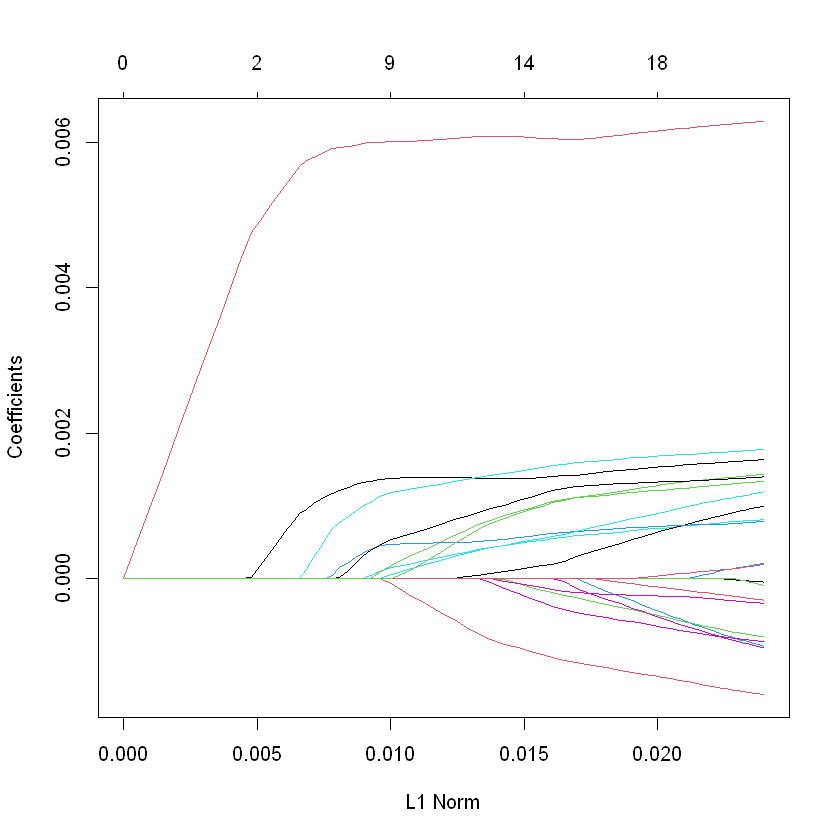

In [96]:
#temp <-grep("Sum_Major_Stem", colnames(df_all))
 # to identify column number of outcomevariable


df_temp_dataframe <-as.data.frame(df_all_males_and_females) 

c<−glmnet (as.matrix (df_temp_dataframe[ −1] ) , df_temp_dataframe[ ,1],standardize=TRUE, alpha =1,label=TRUE)

plot(c)





In [97]:
df_temp_dataframe <-as.data.frame(df_all_males_and_females) 

cv<−cv.glmnet (as.matrix (df_temp_dataframe[ −1] ), df_temp_dataframe[,1] , standardize=TRUE, type.measure='mse', nfold  =5,alpha =1)



df_temp_dataframe <-as.data.frame(df_males_only) 

cv_males_only<−cv.glmnet (as.matrix (df_temp_dataframe[ −1] ), df_temp_dataframe[,1] , standardize=TRUE, type.measure='mse', nfold  =5,alpha =1)

df_temp_dataframe <-as.data.frame(df_females_only) 

cv_females_only<−cv.glmnet (as.matrix (df_temp_dataframe[ −1] ), df_temp_dataframe[,1] , standardize=TRUE, type.measure='mse', nfold  =5,alpha =1)



#plot(cv_females_only)
#plot(cv_males_only)





Using crossvalidation to find the *optimal lambda or penalizing factor* that minimizes the mean squared error. 




min is the value of λ that gives minimum mean cross-validated error. The other λ saved is lambda. 1se , which gives the most regularized model such that error is within one standard error of the minimum.
We will according to custom,use the latter.

**Printing the non-zero coefficients after penalization at the optimum lambda:**

In [98]:


cat("Significant x variables in combined dataset")
CF <- as.matrix(coef(cv, cv$lambda.1se))
CF[CF!=0,]

cat("Significant x variables among males")
CF <- as.matrix(coef(cv_males_only, cv_males_only$lambda.1se))
CF[CF!=0,]
cat("Significant x variables among females")

CF <- as.matrix(coef(cv_females_only, cv_females_only$lambda.1se))
CF[CF!=0,]



Significant x variables in combined dataset

(Intercept) exp1_stemreturn_1 exp1_stemreturn_2 exp3_stemreturn_1 
     4.170956e-01      1.168317e-03      5.917516e-03      6.850650e-04 
exp4_stemreturn_2 
     4.598364e-05

Significant x variables among males

(Intercept) exp1_stemreturn_1 exp1_stemreturn_2 exp3_stemreturn_1 
     4.599623e-01      9.615111e-04      6.009774e-03      8.294377e-04 
exp4_stemreturn_6 
     3.062746e-06

Significant x variables among females

(Intercept) exp1_stemreturn_2 
      0.337500323       0.004702572

Why not Ridge regression?


* Lasso can set some coefficients to zero, thus performing variable selection, while ridge regression cannot.
Both methods allow to use correlated predictors, but they solve multicollinearity issue differently:

* In ridge regression, the coefficients of correlated predictors are similar;
In lasso, one of the correlated predictors has a larger coefficient, while the rest are (nearly) zeroed.




#### Limitations of LASSO


* If p>n, the lasso selects at most
n variables. The number of
selected variables is bounded by the number of samples.
* Grouped variables: the lasso fails to do grouped selection. It
tends to select one variable from a group and ignore the others. (IMPORTANT!)



*Zou, Hui, and Trevor Hastie. "Regularization and variable selection via the elastic net." Journal of the royal statistical society: series B (statistical methodology) 67.2 (2005): 301-320.




### Elastic Net regularization

In [99]:

library(caret)

# Model Building : Elastic Net Regression 
train_control <- trainControl(method = "repeatedcv", 
                              number = 5, 
                              repeats = 5, 
                              search = "random", 
                              verboseIter = TRUE) 
  
# Training ELastic Net Regression model for both males and females 
elastic_model_all <- train(Sum_Major_Stem ~ ., 
                           data = df_all_males_and_females, 
                           method = "glmnet", 
                           preProcess = c("center", "scale"), 
                           tuneLength = 25, 
                           trControl = train_control) 
# Training ELastic Net Regression model for both males and females 
elastic_model_males_only <- train(Sum_Major_Stem ~ ., 
                           data = df_males_only, 
                           method = "glmnet", 
                           preProcess = c("center", "scale"), 
                           tuneLength = 25, 
                           trControl = train_control) 


# Training ELastic Net Regression model for both males and females 
elastic_model_females_only <- train(Sum_Major_Stem ~ ., 
                           data = df_females_only, 
                           method = "glmnet", 
                           preProcess = c("center", "scale"), 
                           tuneLength = 25, 
                           trControl = train_control) 




  
#elastic_model # comment in to see training repetitions




+ Fold1.Rep1: alpha=0.80187, lambda=0.007366 
- Fold1.Rep1: alpha=0.80187, lambda=0.007366 
+ Fold1.Rep1: alpha=0.10225, lambda=6.662203 
- Fold1.Rep1: alpha=0.10225, lambda=6.662203 
+ Fold1.Rep1: alpha=0.47758, lambda=0.002845 
- Fold1.Rep1: alpha=0.47758, lambda=0.002845 
+ Fold1.Rep1: alpha=0.84412, lambda=0.099883 
- Fold1.Rep1: alpha=0.84412, lambda=0.099883 
+ Fold1.Rep1: alpha=0.70303, lambda=0.001636 
- Fold1.Rep1: alpha=0.70303, lambda=0.001636 
+ Fold1.Rep1: alpha=0.54776, lambda=0.001267 
- Fold1.Rep1: alpha=0.54776, lambda=0.001267 
+ Fold1.Rep1: alpha=0.66981, lambda=0.013788 
- Fold1.Rep1: alpha=0.66981, lambda=0.013788 
+ Fold1.Rep1: alpha=0.42278, lambda=0.003115 
- Fold1.Rep1: alpha=0.42278, lambda=0.003115 
+ Fold1.Rep1: alpha=0.07419, lambda=0.002570 
- Fold1.Rep1: alpha=0.07419, lambda=0.002570 
+ Fold1.Rep1: alpha=0.90905, lambda=4.374528 
- Fold1.Rep1: alpha=0.90905, lambda=4.374528 
+ Fold1.Rep1: alpha=0.09216, lambda=0.395758 
- Fold1.Rep1: alpha=0.09216, lambd

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Aggregating results
Selecting tuning parameters
Fitting alpha = 0.67, lambda = 0.0138 on full training set
+ Fold1.Rep1: alpha=0.981422, lambda=0.001897 
- Fold1.Rep1: alpha=0.981422, lambda=0.001897 
+ Fold1.Rep1: alpha=0.610118, lambda=0.004943 
- Fold1.Rep1: alpha=0.610118, lambda=0.004943 
+ Fold1.Rep1: alpha=0.930859, lambda=7.771547 
- Fold1.Rep1: alpha=0.930859, lambda=7.771547 
+ Fold1.Rep1: alpha=0.427044, lambda=4.311903 
- Fold1.Rep1: alpha=0.427044, lambda=4.311903 
+ Fold1.Rep1: alpha=0.004665, lambda=0.173142 
- Fold1.Rep1: alpha=0.004665, lambda=0.173142 
+ Fold1.Rep1: alpha=0.965405, lambda=0.002258 
- Fold1.Rep1: alpha=0.965405, lambda=0.002258 
+ Fold1.Rep1: alpha=0.165797, lambda=0.324681 
- Fold1.Rep1: alpha=0.165797, lambda=0.324681 
+ Fold1.Rep1: alpha=0.372791, lambda=0.118078 
- Fold1.Rep1: alpha=0.372791, lambda=0.118078 
+ Fold1.Rep1: alpha=0.114472, lambda=2.685978 
- Fold1.Rep1: alpha=0.114472, lambda=2.685978 
+ Fold1.Rep1: alpha=0.425202, lambda=0.041171 


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Aggregating results
Selecting tuning parameters
Fitting alpha = 0.977, lambda = 0.0115 on full training set
+ Fold1.Rep1: alpha=0.13144, lambda=3.347704 
- Fold1.Rep1: alpha=0.13144, lambda=3.347704 
+ Fold1.Rep1: alpha=0.53007, lambda=0.001206 
- Fold1.Rep1: alpha=0.53007, lambda=0.001206 
+ Fold1.Rep1: alpha=0.94049, lambda=0.032355 
- Fold1.Rep1: alpha=0.94049, lambda=0.032355 
+ Fold1.Rep1: alpha=0.48240, lambda=0.010316 
- Fold1.Rep1: alpha=0.48240, lambda=0.010316 
+ Fold1.Rep1: alpha=0.89284, lambda=4.213683 
- Fold1.Rep1: alpha=0.89284, lambda=4.213683 
+ Fold1.Rep1: alpha=0.20675, lambda=0.012095 
- Fold1.Rep1: alpha=0.20675, lambda=0.012095 
+ Fold1.Rep1: alpha=0.41017, lambda=1.205503 
- Fold1.Rep1: alpha=0.41017, lambda=1.205503 
+ Fold1.Rep1: alpha=0.11700, lambda=0.010818 
- Fold1.Rep1: alpha=0.11700, lambda=0.010818 
+ Fold1.Rep1: alpha=0.87434, lambda=0.003156 
- Fold1.Rep1: alpha=0.87434, lambda=0.003156 
+ Fold1.Rep1: alpha=0.10962, lambda=0.005052 
- Fold1.Rep1: alph

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Aggregating results
Selecting tuning parameters
Fitting alpha = 0.567, lambda = 0.03 on full training set


In [100]:
elastic_model_all$bestTune
#alpha and lambda that is best performing for entire data set

,alpha,lambda
,<dbl>,<dbl>
15,0.6698146,0.01378771


In [101]:
cat("Within entire data set,the number of variables have been shrunk to 11")
CF_all <- as.matrix(coef(elastic_model_all$finalModel, elastic_model_all$bestTune$lambda))
as.data.frame(CF_all[CF_all!=0,])





Within entire data set,the number of variables have been shrunk to 11

,"CF_all[CF_all != 0, ]"
,<dbl>
(Intercept),0.382701299
exp1_stemreturn_1,0.057662891
exp1_stemreturn_2,0.191348960
exp1_stemreturn_3,-0.001787290
exp1_stemreturn_5,0.013551983
exp2_stemreturn_2,0.005012965
exp2_stemreturn_3,-0.020174086
exp2_stemreturn_4,0.022715620
exp3_stemreturn_1,0.031778589


In [102]:
cat("Within males,the number of variables have been shrunk to 16")
CF_males_only <- as.matrix(coef(elastic_model_males_only$finalModel, elastic_model_males_only$bestTune$lambda))
as.data.frame(CF_males_only[CF_males_only!=0,])





Within males,the number of variables have been shrunk to 16

,"CF_males_only[CF_males_only != 0, ]"
,<dbl>
(Intercept),0.482871287
exp1_stemreturn_1,0.044675224
exp1_stemreturn_2,0.199125499
exp1_stemreturn_3,-0.008492089
exp1_stemreturn_5,0.005977595
exp2_stemreturn_2,0.002814116
exp2_stemreturn_3,-0.018906391
exp2_stemreturn_4,0.034211710
exp3_stemreturn_1,0.032544453


In [103]:
cat("Within females,the number of variables have been shrunk to 11")
CF_females_only <- as.matrix(coef(elastic_model_females_only$finalModel, elastic_model_females_only$bestTune$lambda))
as.data.frame(CF_females_only[CF_females_only!=0,])


Within females,the number of variables have been shrunk to 11

,"CF_females_only[CF_females_only != 0, ]"
,<dbl>
(Intercept),0.2721311475
exp1_stemreturn_1,0.0470518730
exp1_stemreturn_2,0.1662845821
exp1_stemreturn_5,0.0079265001
exp2_stemreturn_2,0.0045150902
exp2_stemreturn_5,-0.0042029081
exp3_stemreturn_1,0.0146149066
exp3_stemreturn_3,0.0006531133
exp4_stemreturn_2,0.0234347575


### Random Forest Feature Selection

Advantages


* No overfitting
* Does not assume the shape ofthe data and is able to deal with highly non linear relationships between variables.
* Uses random feature selection,variables ranked on how well they lower RMSE in each split of the decision tree.


However, 

* Correlated features will be given equal or similar importance, but overall reduced importance compared to the same tree built without correlated counterparts.
* Random Forests and decision trees, in general, give preference to features with high cardinality ( Trees are biased to these type of variables ).


##### Variable importances for entire dataset


Warning message in gg_vimp.rfsrc(forest):
"rfsrc object does not contain VIMP information. Calculating..."
Warning message:
"Removed 9 rows containing missing values (position_stack)."


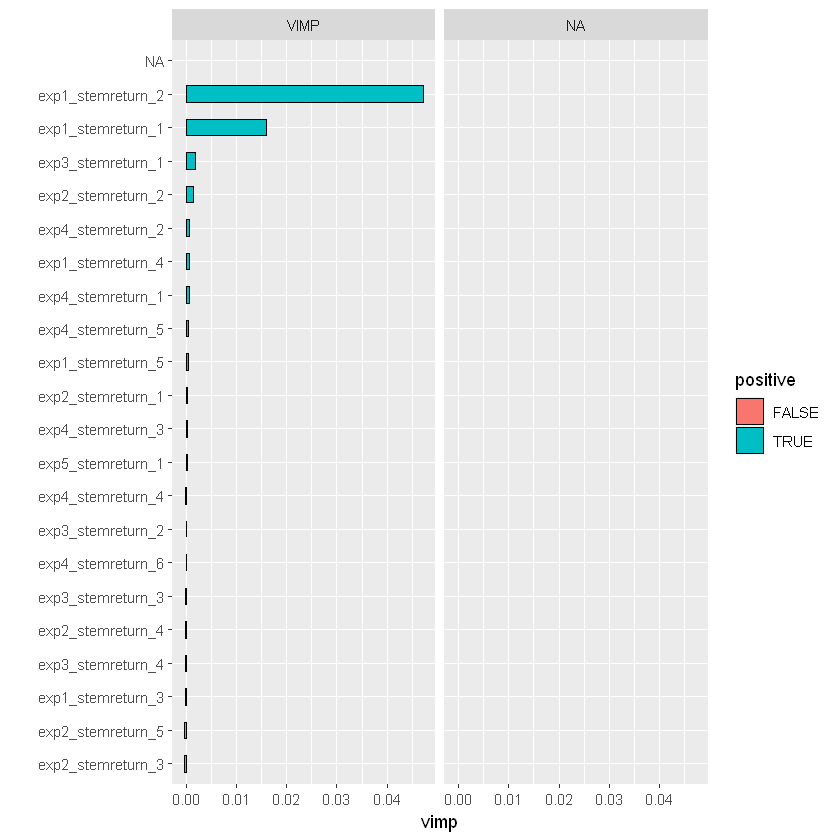

In [104]:

forest<- rfsrc(Sum_Major_Stem~., data =as.data.frame( df_all_males_and_females))
vimp_imp=gg_vimp(forest)


plot(vimp_imp[1:30,],main="Permutation Feature Importance")


##### Variable importances for males only

Warning message in gg_vimp.rfsrc(forest):
"rfsrc object does not contain VIMP information. Calculating..."
Warning message:
"Removed 9 rows containing missing values (position_stack)."


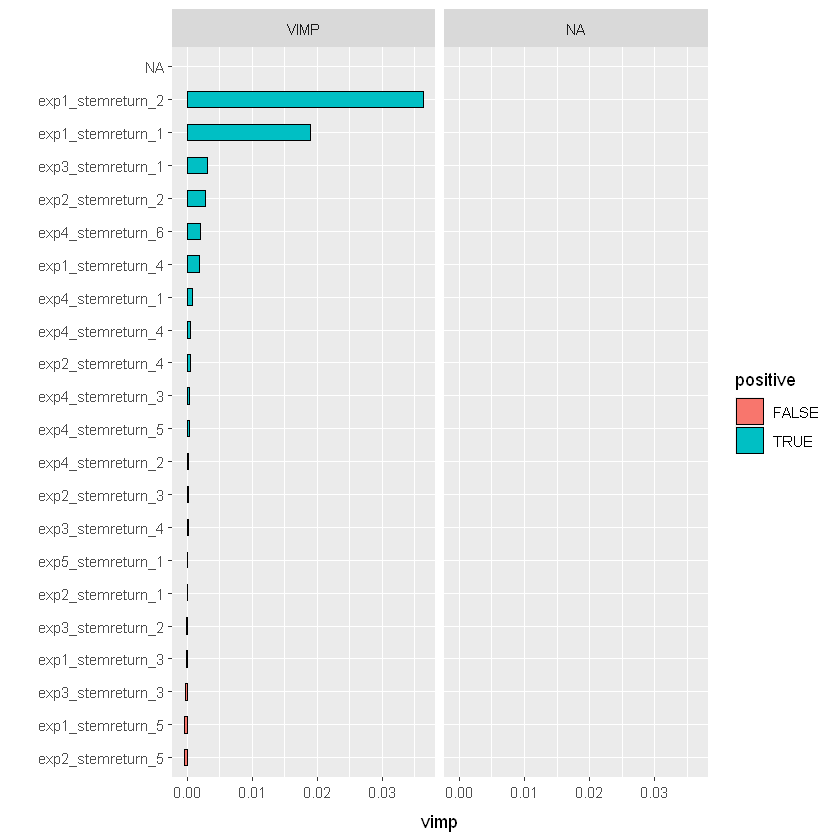

In [105]:

forest<- rfsrc(Sum_Major_Stem~., data =as.data.frame( df_males_only))
vimp_imp=gg_vimp(forest)


plot(vimp_imp[1:30,],main="Permutation Feature Importance")


##### Variable importances for females only

Warning message in gg_vimp.rfsrc(forest):
"rfsrc object does not contain VIMP information. Calculating..."
Warning message:
"Removed 9 rows containing missing values (position_stack)."


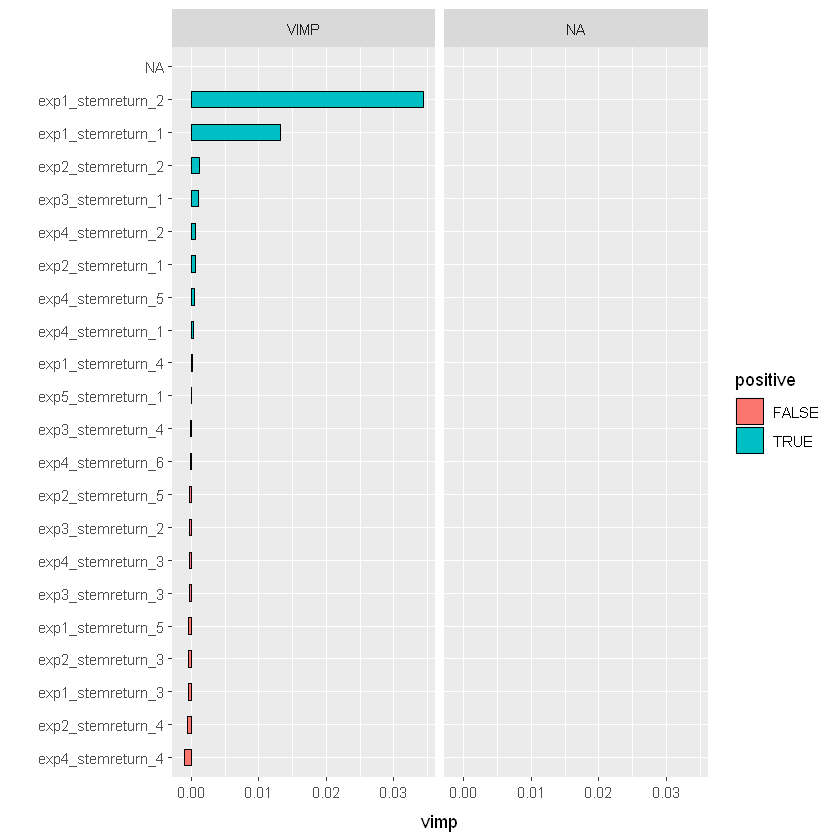

In [106]:

forest<- rfsrc(Sum_Major_Stem~., data =as.data.frame( df_females_only))
vimp_imp=gg_vimp(forest)


plot(vimp_imp[1:30,],main="Permutation Feature Importance")


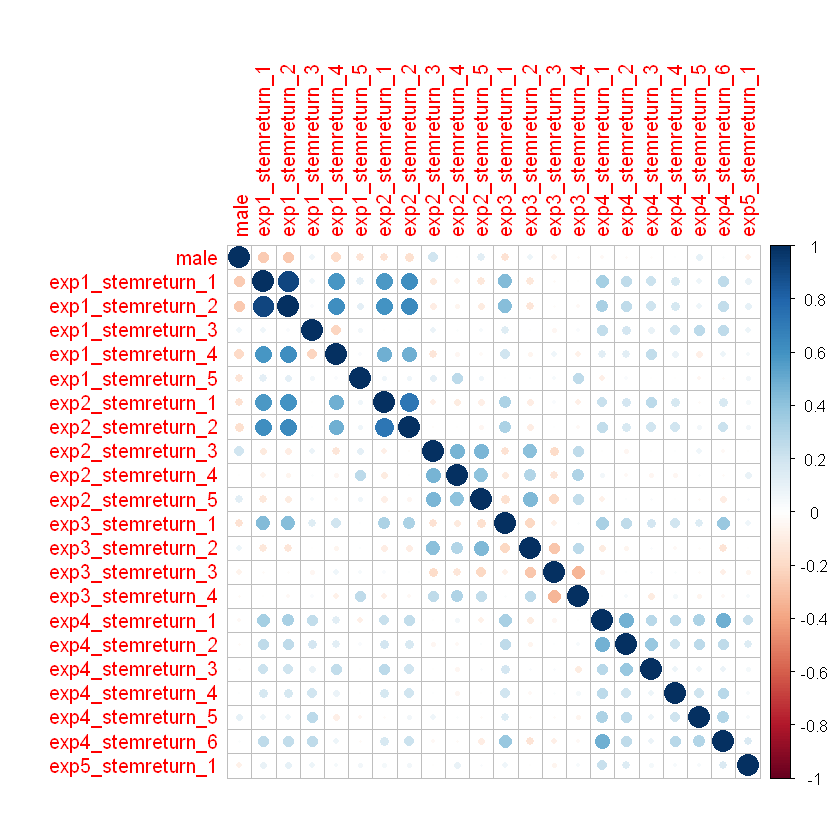

In [107]:
#install.packages("corrplot")
library(corrplot)
#install.packages("ggplot2")
library(ggplot2)


df_temp3<-df_all[-1]

cc = cor(df_temp3, method = "spearman")
corrplot(cc)
